# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1-   Yassmine Haggag 46-15000
  
2-   Mariam Wael 46-1356


### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

### 1- Read the data

In [3]:
df = pd.read_csv("AirQualityUCI.csv")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 2- Drop unwanted labels

In [4]:
df = df.drop(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)'], axis=1)
df.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 3- Handle missing data

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Date              0.00000
Time              0.00000
PT08.S1(CO)       3.91151
PT08.S2(NMHC)     3.91151
PT08.S3(NOx)      3.91151
NO2(GT)          17.54836
PT08.S4(NO2)      3.91151
PT08.S5(O3)       3.91151
T                 3.91151
RH                3.91151
AH                3.91151
dtype: float64
Date             0
Time             0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


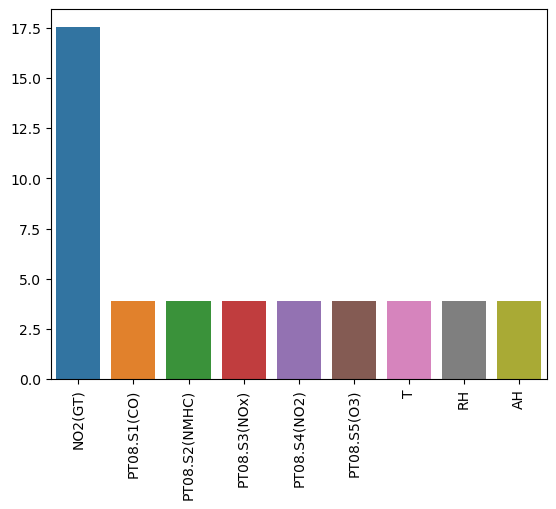

In [5]:
print(df.isnull().sum())
print(100* df.isnull().sum() / len(df))

def percent_missing(df):
    percent_nan = 100*df.isna().mean()
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    return percent_nan

percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#we will remove the null values by replacing them with the median in all columns other than the target
df['PT08.S1(CO)'] = df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].median())
df['PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].median())
df['PT08.S3(NOx)'] = df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].median())
df['PT08.S4(NO2)'] = df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].median())
df['PT08.S5(O3)'] = df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].median())
df['T'] = df['T'].fillna(df['T'].median())
df['RH'] = df['RH'].fillna(df['RH'].median())
df['AH'] = df['AH'].fillna(df['AH'].median())

#we will keep the rows with no null values at the target
df = df[~df['NO2(GT)'].isna()]
print(df.isnull().sum())

df.head()

### 4- Replace date feature

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(['Date'], axis=1)
df.head()

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004


### 5- Replace time feature

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second
df = df.drop(['Time'], axis=1)
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Hour,Minute,Second
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,18,0,0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,19,0,0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,20,0,0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,21,0,0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,22,0,0


### 6- Apply feature scaling

In [8]:
X = df.drop(['NO2(GT)'], axis=1)
y = df['NO2(GT)']
X,y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

(      PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
 0          1360.0         1046.0        1056.0        1692.0       1268.0   
 1          1292.0          955.0        1174.0        1559.0        972.0   
 2          1402.0          939.0        1140.0        1555.0       1074.0   
 3          1376.0          948.0        1092.0        1584.0       1203.0   
 4          1272.0          836.0        1205.0        1490.0       1110.0   
 ...           ...            ...           ...           ...          ...   
 9352       1314.0         1101.0         539.0        1374.0       1729.0   
 9353       1163.0         1027.0         604.0        1264.0       1269.0   
 9354       1142.0         1063.0         603.0        1241.0       1092.0   
 9355       1003.0          961.0         702.0        1041.0        770.0   
 9356       1071.0         1047.0         654.0        1129.0        816.0   
 
          T    RH      AH  Day  Month  Year  Hour  Minute  Sec

[[937.0,
  698.0,
  1039.0,
  1382.0,
  768.0,
  20.1,
  42.0,
  0.9763,
  21.0,
  5.0,
  2004.0,
  1.0,
  0.0,
  0.0]]### 7- Evaluate different degrees of lasso CV polynomial regression

In [9]:
from sklearn.linear_model import LassoCV

# TRAINING ERROR PER DEGREE
train_rmse_errors_la = []
# TEST ERROR PER DEGREE
test_rmse_errors_la = []

for d in range(1,5):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #APPLY FEATURE SCALING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    model = LassoCV(eps=0.1,n_alphas=10,cv=5)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later train_rmse_errors.append(train_RMSE)
    train_rmse_errors_la.append(train_RMSE)
    test_rmse_errors_la.append(test_RMSE)
    print(d)

1
2
3
4


c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+03, tolerance: 1.268e+03
  model = cd_fast.enet_coordinate_descent(


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

ERRORS:
Train errors:  [25.884719613876232, 25.712889050502667, 25.76410047768075, 25.73980765518629]
Test errors:  [26.317309809643127, 26.200620209915467, 26.228701478651605, 26.15751630222092]
Model coefficients:  [ 0.          0.         -3.94602438 ...  0.          0.
  0.        ]
Lasso paremeters:  3.3925962844497337
BEST DEGREE:  1


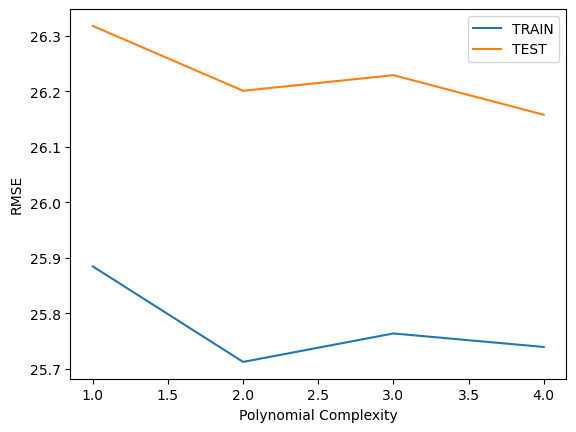

In [10]:
plt.plot(range(1,5),train_rmse_errors_la,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors_la,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
print('ERRORS:')
print('Train errors: ', train_rmse_errors_la)
print('Test errors: ',test_rmse_errors_la)
la_coef = model.coef_
print('Model coefficients: ', la_coef)
la_alpha = model.alpha_
print('Lasso paremeters: ', la_alpha)
# since the difference between error of the 1st degree and error of the 4th is about 0.15, its not worth the complexity
la_best = 1
print('BEST DEGREE: ', la_best)

### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [11]:
from sklearn.linear_model import RidgeCV

# TRAINING ERROR PER DEGREE
train_rmse_errors_rd = []
# TEST ERROR PER DEGREE
test_rmse_errors_rd = []

for d in range(1,7):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #APPLY FEATURE SCALING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')   
    ridge_cv_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later train_rmse_errors.append(train_RMSE)
    train_rmse_errors_rd.append(train_RMSE)
    test_rmse_errors_rd.append(test_RMSE)
    print(d)

1
2
3
4
5
6


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

ERRORS:
Train errors:  [24.586518246393673, 21.08250741569196, 17.764196700874603, 15.340426845543243, 13.747827364900038, 13.80891540927521]
Test errors:  [25.16260710082757, 22.032427287205888, 19.332533989982977, 17.687824254704466, 16.998615026439207, 16.906855670761512]
Model coefficients:  [ 2.84085105  3.61403869 -3.03190668 ...  0.          0.
  0.        ]
Ridge paremeters:  1.0
BEST DEGREE:  6


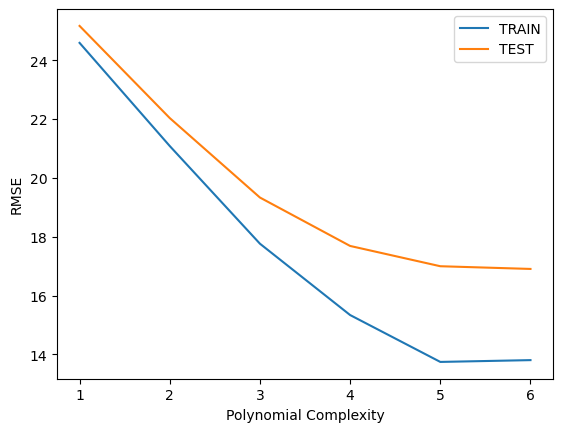

In [12]:
plt.plot(range(1,7),train_rmse_errors_rd,label='TRAIN')
plt.plot(range(1,7),test_rmse_errors_rd,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
print('ERRORS:')
print('Train errors: ', train_rmse_errors_rd)
print('Test errors: ',test_rmse_errors_rd)
rd_coef = ridge_cv_model.coef_
print('Model coefficients: ', rd_coef)
rd_alpha = ridge_cv_model.alpha_
print('Ridge paremeters: ', rd_alpha)
rd_best = test_rmse_errors_rd.index(min(test_rmse_errors_rd))+1
print('BEST DEGREE: ', rd_best)

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [13]:
from sklearn.linear_model import ElasticNetCV

# TRAINING ERROR PER DEGREE
train_rmse_errors_el = []
# TEST ERROR PER DEGREE
test_rmse_errors_el = []

for d in range(1,5):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #APPLY FEATURE SCALING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)    
    elastic_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = elastic_model.predict(X_train)
    test_pred = elastic_model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later train_rmse_errors.append(train_RMSE)
    train_rmse_errors_el.append(train_RMSE)
    test_rmse_errors_el.append(test_RMSE)    
    print(d)

1


c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+05, tolerance: 1.268e+05
  model = cd_fast.enet_coordinate_descent(


2


c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+05, tolerance: 1.268e+05
  model = cd_fast.enet_coordinate_descent(


3
4


c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+05, tolerance: 1.268e+05
  model = cd_fast.enet_coordinate_descent(


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

ERRORS:
Train errors:  [24.587323945183464, 21.663763159562397, 19.993233609874586, 19.22534867856306]
Test errors:  [25.16355487200929, 22.510811313175775, 20.95230184847533, 20.291743711440162]
Model coefficients:  [  7.35979578  17.24668604 -14.4865654  ...   0.           0.
   0.        ]
ElasticNet paremeters:  1.0
BEST DEGREE:  4


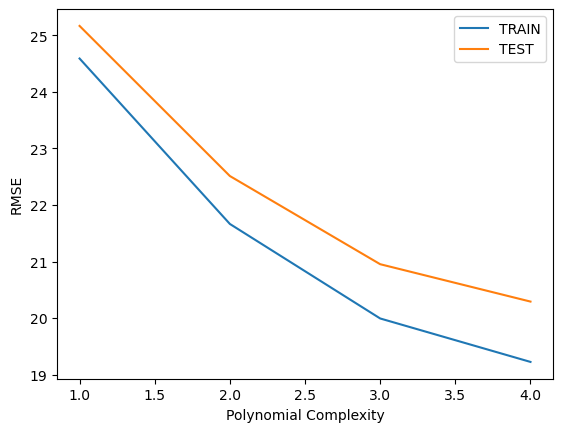

In [14]:
plt.plot(range(1,5),train_rmse_errors_el,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors_el,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
print('ERRORS:')
print('Train errors: ', train_rmse_errors_el)
print('Test errors: ',test_rmse_errors_el)
el_coef = elastic_model.coef_
print('Model coefficients: ', el_coef)
el_ratio = elastic_model.l1_ratio_
print('ElasticNet paremeters: ', el_ratio)
el_best = test_rmse_errors_el.index(min(test_rmse_errors_el))+1 
print('BEST DEGREE: ', el_best)

### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [18]:
# LASSO DEGREE 1
polynomial_converter_lasso = PolynomialFeatures(degree=1,include_bias=False)
poly_features_lasso = polynomial_converter_lasso.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features_lasso, y, test_size=0.3, random_state=101)

#APPLY FEATURE SCALING
scaler_lasso = StandardScaler()
scaler_lasso.fit(X_train)
X_train = scaler_lasso.transform(X_train)
X_test = scaler_lasso.transform(X_test)

# TRAIN ON THIS NEW POLY SET
model = LassoCV(eps=0.1,n_alphas=10,cv=5)
model.fit(X_train,y_train)

# PREDICT ON BOTH TRAIN AND TEST
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate Errors

# Errors on Train Set
train_RMSE_lasso = np.sqrt(mean_squared_error(y_train,train_pred))

# Errors on Test Set
test_RMSE_lasso = np.sqrt(mean_squared_error(y_test,test_pred))

print('Lasso degree 1 Test RMSE Error Value: ', test_RMSE_lasso, 'Model Coefficients: ', model.coef_ , 'Parameters: ', model.alpha_) 

# RIDGE DEGREE 6
polynomial_converter_ridge = PolynomialFeatures(degree=6,include_bias=False)
poly_features_ridge = polynomial_converter_ridge.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features_ridge, y, test_size=0.3, random_state=101)

#APPLY FEATURE SCALING
scaler_ridge = StandardScaler()
scaler_ridge.fit(X_train)

X_train = scaler_ridge.transform(X_train)
X_test = scaler_ridge.transform(X_test)

# TRAIN ON THIS NEW POLY SET
ridge_cv_model = RidgeCV(alphas=1.0,scoring='neg_mean_absolute_error')   
ridge_cv_model.fit(X_train,y_train)

# PREDICT ON BOTH TRAIN AND TEST
train_pred = ridge_cv_model.predict(X_train)
test_pred = ridge_cv_model.predict(X_test)

# Calculate Errors
    
# Errors on Train Set
train_RMSE_ridge = np.sqrt(mean_squared_error(y_train,train_pred))
    
# Errors on Test Set
test_RMSE_ridge = np.sqrt(mean_squared_error(y_test,test_pred))

print('Ridge degree 6 Test RMSE Error Value: ', test_RMSE_ridge, 'Model Coefficients: ', ridge_cv_model.coef_ , 'Parameters: ', ridge_cv_model.alpha_) 

#ELASTICNET DEGREE 4
polynomial_converter_elastic = PolynomialFeatures(degree=4,include_bias=False)
poly_features_elastic = polynomial_converter_elastic.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features_elastic, y, test_size=0.3, random_state=101)

#APPLY FEATURE SCALING
scaler_elastic = StandardScaler()
scaler_elastic.fit(X_train)
X_train = scaler_elastic.transform(X_train)
X_test = scaler_elastic.transform(X_test)

# TRAIN ON THIS NEW POLY SET
elastic_model = ElasticNetCV(l1_ratio=1,tol=0.01)    
elastic_model.fit(X_train,y_train)

# PREDICT ON BOTH TRAIN AND TEST
train_pred = elastic_model.predict(X_train)
test_pred = elastic_model.predict(X_test)

# Calculate Errors

# Errors on Train Set
train_RMSE_elastic = np.sqrt(mean_squared_error(y_train,train_pred))

# Errors on Test Set
test_RMSE_elastic = np.sqrt(mean_squared_error(y_test,test_pred))

print('ElasticNet degree 4 Test RMSE Error Value: ', test_RMSE_elastic, 'Model Coefficients: ', elastic_model.coef_ , 'Parameters: ', elastic_model.l1_ratio_) 


Lasso degree 1 Test RMSE Error Value:  26.317309809643127 Model Coefficients:  [  0.          11.34885003  -8.48010203  -0.          12.714011
  -0.          -0.10332322 -13.39236717  -0.           0.
   8.62139916   4.9853421    0.           0.        ] Parameters:  3.3024782001932134
Ridge degree 6 Test RMSE Error Value:  16.906855670761512 Model Coefficients:  [ 2.84085105  3.61403869 -3.03190668 ...  0.          0.
  0.        ] Parameters:  1.0
ElasticNet degree 4 Test RMSE Error Value:  20.291743711440162 Model Coefficients:  [  7.35979578  17.24668604 -14.4865654  ...   0.           0.
   0.        ] Parameters:  1


c:\Users\maria\anaconda3\envs\MLC\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+05, tolerance: 1.268e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from joblib import dump

# since ridge had the least error of 16.9, we will save that as the best model

dump(ridge_cv_model, 'best_model.joblib')
dump(polynomial_converter_ridge, 'converter.joblib')
dump(scaler_ridge, 'scaler.bin')

### 12- Load the best model and test it on a sample that you manually created it.

In [17]:
from joblib import load
loaded_model = load('best_model.joblib')
loaded_converter = load('converter.joblib')
loaded_scaler = load('scaler.bin')

sample = [[1200.0,
  698.0,
  1039.0,
  1382.0,
  768.0,
  20.1,
  42.0,
  0.9763,
  21.0,
  5.0,
  2004.0,
  1.0,
  0.0,
  0.0]]

poly_features = loaded_converter.fit_transform(sample)
sample = loaded_scaler.transform(poly_features)

predict = loaded_model.predict(sample)
 
print(predict)

[68.2727823]


## Great work!
----